# NumPy

NumPy é um pacote fundamental para computação científica em Python, sendo usado como base para praticamente todos os outros. Suas capacidades incluem uma poderosa classe *array*, que pode representar vetores e matrizes, sofisticadas funções para manipulação de *arrays*, ferramentas para integração de códigos em C/C++ e Fortran, além de funções de álgebra linear e de geração de números aleatórios. Os *arrays* de NumPy também podem ser usados para armazenar dados de tipos genéricos, permitindo fácil integração com diferentes tipos de bases e bancos de dados. A documentação completa para todas as versões de NumPy pode ser encontrada em [numpy.org/doc](https://numpy.org/doc).

## A classe *array*

A classe *array* é o principal componente de NumPy e representa uma lista homogênea multidimensional, na forma de uma tabela de elementos (normalmente números), todos do mesmo tipo, indexada por tuplas de inteiros positivos. Um dimensão de um *array* é chamada de eixo (*axis*). Abaixo, temos dois exemplos de *arrays* (note sua criação por meio de listas):

In [1]:
import numpy as np

a = np.array([1, 2, 1])  # Uma dimensão, 3 elementos, tipo inteiro
b = np.array([
    [1., 0., 1.], 
    [0., 1., 2.]
])  # Duas dimensões, a primeira com tamanho 2 e a segunda com tamanho 3, tipo ponto flutuante

print(len(a), a.dtype)
print(b.shape, len(b), b.dtype)
print(b)

3 int64
(2, 3) 2 float64
[[1. 0. 1.]
 [0. 1. 2.]]


A biblioteca padrão de Python também tem uma classe *array.array*, mas ela serve apenas pra casos unidimensionais e oferece menos funcionalidades. Os atributos mais importantes do *array* de numpy incluem:

   * array.ndim: o número de eixos do *array*
   * array.shape: as dimensões do *array* na forma de uma tupla indicando o tamanho de cada dimensão; matriz $n \times m$ possui shape $(n, m)$
   * array.size: o número total de elementos no *array*
   * array.dtype: o tipo dos elementos do *array*

### Criando *arrays*

A criação de um *array* pode ser feita usando listas ou tuplas, com o tipo dos dados sendo deduzido através dos tpos dos elementos da sequência. Uma lista de listas resultará em um *array* bidimensional, uma lista de listas de listas dará um *array* tridimensional e assim por diante. É possível especificar o tipo do *array* na hora da criação:

In [2]:
b = np.array(
    [
        [1., 0., 1.], 
        [0., 1., 2.]
    ],
    dtype=complex
)
print(b)

[[1.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 2.+0.j]]


Frequentemente é necessario criar *arrays* com um tamanho definido e valores iniciais que serão posteriormente modificados. Para isso, NumPy fornece diversas funções, incluindo a função *zeros*, que cria um *array* preenchido com zeros; *ones*, que cria um *array* preenchido com uns; *empty*, que cria um *array* cujo conteúdo inicial é aleatório e depende do estado da memória; e *eye*, que cria uma matriz identidade.

In [3]:
print(np.zeros((3, 4)))  # Note que as dimensões são passadas como uma tupla
print()
print(np.ones((3, 4)))
print()
print(np.empty((3, 4)))  # Saída pode variar
print()
print(np.eye(3, dtype=np.int32))  # Basta passar uma dimensão, pois a matriz será quadrada

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

[[1 0 0]
 [0 1 0]
 [0 0 1]]


Para criar sequências de números, pode-se usar a função *arange*, que é análoga à função *range*, mas retorna *arrays* e aceita criar intervalos de pontos flutuantes.

In [4]:
print(np.arange(5, 20, 5))
print()
print(np.arange(0, 2, 0.4))

[ 5 10 15]

[0.  0.4 0.8 1.2 1.6]


Devido a possíveis problemas de arredondamento, não é sempre possível saber quantos elementos serão gerados pela função *arange* ao receber pontos flutuantes como parâmetros. Nesses casos, é melhor usar a função *linspace*, que recebe como argumentos o início, o fim (inclusivo) e o número de valores desejados no intervalo.

In [5]:
print(np.linspace(0, 1, 9))  # 9 números começando em 0 e terminando em 1

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


A função *linspace* é útil para avaliar funções em muitos pontos.

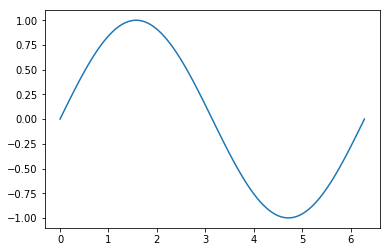

In [47]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)
f = np.sin(x)

plt.plot(x, f)
plt.show()

### Operações básicas

Operações aritméticas com *arrays* sempre são aplicadas elemento-a-elemento, criando um novo *array* como resultado:

In [7]:
a = np.array([10, 20, 30, 40])
print(a)
b = np.arange(4)
print(b)
print()

c = a - b
print(c)
print()

print(b ** 2)
print()

print(a < 25)
print()

print(a * b)

[10 20 30 40]
[0 1 2 3]

[10 19 28 37]

[0 1 4 9]

[ True  True False False]

[  0  20  60 120]


O operador '\*' multiplica os *arrays* através dos elementos. Para realizar a multiplicação de matrizes, pode-se usar o operador '@', a função *dot* do NumPy, ou o método *dot* do *array*:

In [8]:
A = np.array(
    [
        [1, 1],
        [0, 1]
    ]
)

B = np.array(
    [
        [2, 0],
        [0, 2]
    ]
)

print(A @ B)
print(np.dot(A, B))
print(A.dot(B))

[[2 2]
 [0 2]]
[[2 2]
 [0 2]]
[[2 2]
 [0 2]]


Algumas operações, como as de atribuição aritmética "+=" e "\*=", modificam o *array* diretamente, ao invés de criar outro com o resultado.

In [9]:
A = np.array(
    [
        [1, 1],
        [0, 1]
    ]
)

A += 1

print(A)

[[2 2]
 [1 2]]


Operações com *arrays* de tipos diferentes resultam em um *array* do tipo mais geral ou preciso (*upcasting*). Exemplo:

In [10]:
a = np.ones(3, dtype=int)
b = np.ones(3, dtype=float)

print((a + b).dtype)

float64


Muitas operações são computadas como métodos da classe *array*, por exemplo a soma de todos os elementos, a média ou o desvio-padrão:

In [11]:
a = np.random.random((5, 3))
print(a)
print(
    'Soma: {}, Média: {}, Desvio-padrão: {}'.format(
        a.sum(), a.mean(), a.std()
    )
)

[[0.56158829 0.91454421 0.23877309]
 [0.19370395 0.70284271 0.51461163]
 [0.37636627 0.45531543 0.04124243]
 [0.34445926 0.61154048 0.34299231]
 [0.04922684 0.11645763 0.25313178]]
Soma: 5.716796321294855, Média: 0.38111975475299037, Desvio-padrão: 0.24046330289202403


Por padrão, essas operações são computadas sobre todos os elementos do *array*, independente das suas dimensões. No entanto, é possível especificar a dimensão desejada, usando o parâmetro *axis*, como mostra o código abaixo:

In [12]:
print(a.sum(axis=0)) # soma de cada coluna
print(a.mean(axis=1))  # média de cada linha  
print(a.cumsum(axis=0))  # soma acumulada de cada coluna

[1.52534461 2.80070047 1.39075124]
[0.5716352  0.4703861  0.29097471 0.43299735 0.13960542]
[[0.56158829 0.91454421 0.23877309]
 [0.75529224 1.61738692 0.75338472]
 [1.13165851 2.07270235 0.79462716]
 [1.47611777 2.68424284 1.13761947]
 [1.52534461 2.80070047 1.39075124]]


### Indexando e iterando sobre elementos

*Arrays* unidimensionais podem ser indexados, fatiados e iterados exatamente como listas e outras coleções.

In [13]:
a = np.arange(8) ** 2
print(a)
print()

print(a[2])
print()

print(a[2:5])
print()

a[:4:2] = -1000
print(a)
print()

print(a[ : :-1])
print()

for i in a:
    print(i * 2)

[ 0  1  4  9 16 25 36 49]

4

[ 4  9 16]

[-1000     1 -1000     9    16    25    36    49]

[   49    36    25    16     9 -1000     1 -1000]

-2000
2
-2000
18
32
50
72
98


*Arrays* multidimensionais podem receber um índice ou fatia por eixo, informados em uma tupla. Por exemplo:

In [14]:
b = np.random.random((5, 4))
print(b)
print()

print(b[2, 3])  # Elemento na terceira linha e quarta coluna
print()

print(b[:, 1])  # A segunda coluna inteira
print()

print(b[:4, 1])  # Do primeiro ao quarto elemento da segunda coluna      
print()

print(b[1:3, :])  # Todas as colunas da segunda à terceira linha              

[[0.07489686 0.28572925 0.34133296 0.60608669]
 [0.64732036 0.71219846 0.02004947 0.07484049]
 [0.51457105 0.32221637 0.69862139 0.13726139]
 [0.76717015 0.92525099 0.16176712 0.76877957]
 [0.95633851 0.22549198 0.44136868 0.29954868]]

0.13726139370459955

[0.28572925 0.71219846 0.32221637 0.92525099 0.22549198]

[0.28572925 0.71219846 0.32221637 0.92525099]

[[0.64732036 0.71219846 0.02004947 0.07484049]
 [0.51457105 0.32221637 0.69862139 0.13726139]]


Quando os índices forem fornecidos em uma tupla menor do que o número de eixos, os índices que não forem fornecidos são considerados fatias completas, i.e. ":". Os índices faltantes também podem ser representados por reticências. Exemplo:

In [15]:
print(b[-1])
print(b[-1, :])
print(b[-1, ...])

[0.95633851 0.22549198 0.44136868 0.29954868]
[0.95633851 0.22549198 0.44136868 0.29954868]
[0.95633851 0.22549198 0.44136868 0.29954868]


NumPy oferece mais formas de indexar os seus *arrays*, usando listas ou *arrays* de inteiros ou booleanos. Quando o *array* *b* é multidimensional, a indexação usando uma única lista de índices se refere à primeira dimensão de *b*.

In [16]:
print(b)
print()

print(b[[1, 4]])  # Segunda e quinta linhas da matriz b, equivale a b[[1, 4], :]
print()

print(b[:, [1, 2]])  # Segunda e terceira colunas da matriz b
print()

print(b[[1, 4], [1, 2]])  # Indexação pareada, equivale a [b[1,1], b[4, 2]]
print()

i = [
    [1, 1],
    [4, 4]
]
j = [
    [1, 2],
    [1, 2]
]

print(b[i, j])  # Indexação pareada, segunda e terceira colunas da segunda e quinta linhas
print()

print(b[
    [[1], [4]],  # Equivale a b[i, j], note que o array
    [1, 2]       # de índices do primeiro eixo é bidimensional
])
print()

b[i, j] = 0  # As posições indexadas podem receber valores
print(b)

[[0.07489686 0.28572925 0.34133296 0.60608669]
 [0.64732036 0.71219846 0.02004947 0.07484049]
 [0.51457105 0.32221637 0.69862139 0.13726139]
 [0.76717015 0.92525099 0.16176712 0.76877957]
 [0.95633851 0.22549198 0.44136868 0.29954868]]

[[0.64732036 0.71219846 0.02004947 0.07484049]
 [0.95633851 0.22549198 0.44136868 0.29954868]]

[[0.28572925 0.34133296]
 [0.71219846 0.02004947]
 [0.32221637 0.69862139]
 [0.92525099 0.16176712]
 [0.22549198 0.44136868]]

[0.71219846 0.44136868]

[[0.71219846 0.02004947]
 [0.22549198 0.44136868]]

[[0.71219846 0.02004947]
 [0.22549198 0.44136868]]

[[0.07489686 0.28572925 0.34133296 0.60608669]
 [0.64732036 0.         0.         0.07484049]
 [0.51457105 0.32221637 0.69862139 0.13726139]
 [0.76717015 0.92525099 0.16176712 0.76877957]
 [0.95633851 0.         0.         0.29954868]]


Para indexar *arrays* usando *arrays* ou listas de booleanos, pode-se usar um *array* com exatamente a mesma quantidade de elementos que o *array* indexado. Isso pode ser muito útil para fazer atribuições. Exemplo:

In [17]:
a = b < 0.5

print(a)
print()

print(b[a])  # array unidimensional com os elementos selecionados
print()

b[a] = 0
print(b)

[[ True  True  True False]
 [False  True  True  True]
 [False  True False  True]
 [False False  True False]
 [False  True  True  True]]

[0.07489686 0.28572925 0.34133296 0.         0.         0.07484049
 0.32221637 0.13726139 0.16176712 0.         0.         0.29954868]

[[0.         0.         0.         0.60608669]
 [0.64732036 0.         0.         0.        ]
 [0.51457105 0.         0.69862139 0.        ]
 [0.76717015 0.92525099 0.         0.76877957]
 [0.95633851 0.         0.         0.        ]]


Também é possível indexar cada dimensão usando *arrays* unidimensionais de booleanos com o mesmo tamanho da dimensão indexada:

In [18]:
b1 = np.array([True, False, True, False, False])
b2 = np.array([True, True, False, False])

print(b[b1])  # Equivale a b[b1, :]
print()

print(b[:, b2])
print()

print(b[b1,b2])
print()

[[0.         0.         0.         0.60608669]
 [0.51457105 0.         0.69862139 0.        ]]

[[0.         0.        ]
 [0.64732036 0.        ]
 [0.51457105 0.        ]
 [0.76717015 0.92525099]
 [0.95633851 0.        ]]

[0. 0.]



Iterações sobre *arrays* multidimensionais são feitas ao longo do primeiro eixo:

In [19]:
for row in b:
    print(row)

[0.         0.         0.         0.60608669]
[0.64732036 0.         0.         0.        ]
[0.51457105 0.         0.69862139 0.        ]
[0.76717015 0.92525099 0.         0.76877957]
[0.95633851 0.         0.         0.        ]


### Redimensionando *arrays*

Como vimos acima, o tamanho das dimensões do *array* pode ser obtido por meio do atributo *shape*:

In [20]:
a = np.arange(12)
print(a)
print(a.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
(12,)


No entanto, a forma do *array* não é fixa e pode ser modificada de diversas formas, retornando um novo *array* com os mesmos elementos do *array* original, mas reposicionados para se adequar à nova forma.

In [21]:
c = a.reshape(4, 3)
print(c)
print()

print(c.ravel())  # retorna o array "achatado" 
print()

print(c.T)  # retorna o array transposto
print()

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

[ 0  1  2  3  4  5  6  7  8  9 10 11]

[[ 0  3  6  9]
 [ 1  4  7 10]
 [ 2  5  8 11]]



A função *reshape* retorna um novo *array*. Para modificar o próprio *array*, pode-se usar a função *resize*:

In [22]:
a.resize(4, 3)
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


Se alguma dimensão receber o valor *-1* para uma operação de redimensionamento, o seu novo tamanho será automaticamente calculado. Por exemplo, se quisermos que *a* tenha *2* linhas e o número necessário de colunas, podemos fazer:

In [23]:
a.reshape(2, -1)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

Se tentarmos tranpor um *array* unidimensional usando o atributo *T*, ele continuará sendo unidimensional. Portanto, para realizar a transposição, podemos usar o método *reshape*, com *-1* no número de linhas, gerando um vetor coluna com o número necessário de linhas:

In [24]:
a = np.arange(12)
print(a)
print(a.T)
print(a.reshape(-1, 1))

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


Outra forma de transpor um *array* unidimensional para obter um vetor coluna é usando o atalho de NumPy para criar novos eixos:

In [25]:
a[:, np.newaxis]

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

### Concatenando *arrays*

As funções *vstack* e *hstack* permitem concatenar dois ou mais *arrays* verticalmente e horizontalmente, respectivamente:

In [26]:
a = np.arange(6).reshape(3, 2)
b = np.random.random((3, 2))

print(np.vstack((a, b)))
print()

print(np.hstack((a, b)))

[[0.         1.        ]
 [2.         3.        ]
 [4.         5.        ]
 [0.50141141 0.87359307]
 [0.48425233 0.60395912]
 [0.69012221 0.34917156]]

[[0.         1.         0.50141141 0.87359307]
 [2.         3.         0.48425233 0.60395912]
 [4.         5.         0.69012221 0.34917156]]


A função *column_stack* concatena dois ou mais *arrays* unidimensionais na forma de colunas em um array 2D resultante:

In [27]:
a = np.arange(3)
b = np.random.random(3)

print(np.column_stack((a, b)))
print()

print(np.hstack((a, b)))  # resultado diferente

[[0.         0.98972958]
 [1.         0.33092818]
 [2.         0.63970443]]

[0.         1.         2.         0.98972958 0.33092818 0.63970443]


Essas funções de concatenação são todas casos especiais de uso mais comum da função *concatenate*, que permite definir o eixo sobre o qual ocorrerá a concatenação.

### Cópias e vistas

Ao operar com *arrays*, os dados são às vezes copiados em um novo *array* e às vezes não, o que pode confundir iniciantes. Por exemplo, atribuições simples não criam cópias do *array*, i.e. elas apenas criam ponteiros para o mesmo objeto:

In [28]:
a = np.arange(12)
b = a
print(b is a)

b.shape = 3,4  # outra forma de mudar a forma de um array
print(a.shape)  # o comando acima muda a forma de a também

True
(3, 4)


Ao chamar funções, Python passa objetos mutáveis como referências, portanto quando um *array* é passado como argumento para uma função, o mesmo objeto estará disponível no escopo da função chamada:

In [29]:
def f(x):
    print(id(x))

print(id(a))
f(a)

140062443582288
140062443582288


O método *view* cria um novo objeto, mas esse novo objeto "olha" para os mesmos dados, ou seja, ele é uma "vista". Vejamos:

In [30]:
c = a.view()
print(c is a)
print(c.base is a)

c.shape = 2,6
print(a.shape)  # a não muda de forma

c[0,4] = 1234  # muda em a também
print(a)

False
True
(3, 4)
[[   0    1    2    3]
 [1234    5    6    7]
 [   8    9   10   11]]


Uma fatia de um *array* retorna uma vista:

In [31]:
s = a[:,1:3]
s[:] = 10

print(a)

[[   0   10   10    3]
 [1234   10   10    7]
 [   8   10   10   11]]


Para obter uma cópia independente de um *array*, usa-se o método *copy*:

In [32]:
d = a.copy()
print(d is a)
print(d.base is a)  # d não compartilha dados com a

d[0,0] = 9999
print(a)

False
False
[[   0   10   10    3]
 [1234   10   10    7]
 [   8   10   10   11]]


## Álgebra linear

A maior parte das funções de álgebra linear de NumPy estão disponíveis no módulo *np.linalg*. Algumas funções importantes incluem calcular a inversa de uma matriz:

In [33]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])
print(np.linalg.inv(a))

[[-2.   1. ]
 [ 1.5 -0.5]]


Calcular a pseudoinversa de uma matriz (se a matriz for invertível, a inversa será calculada):

In [34]:
print(np.linalg.pinv(a))

[[-2.   1. ]
 [ 1.5 -0.5]]


Calcular o determinante e o traço de uma matriz:

In [35]:
print(np.linalg.det(a))
print(np.trace(a))  # o traço está disponível no próprio np

-2.0000000000000004
5.0


Obter a diagonal de uma matriz como um vetor:

In [36]:
np.diag(a)

array([1., 4.])

Obter uma matriz diagonal a partir de um vetor:

In [37]:
np.diag(np.diag(a))

array([[1., 0.],
       [0., 4.]])

Resolve rum sistema de equações lineares:

In [38]:
y = np.array([[5.0], [7.0]])
np.linalg.solve(a, y)

array([[-3.],
       [ 4.]])

Encontrar os autovalores e os autovetores de uma matriz:

In [39]:
np.linalg.eig(a)  # retorna uma tupla (autovalores, autovetores)

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

## Ordenando *arrays*

NumPy oferece algumas funções para ordenar *arrays*. A principal delas é a função *sort*, que retorna uma cópia ordenada do *array* passado como parâmetro:

In [40]:
a = np.array([12, 9, 13, -1, 0, -4, 2, 7, 1])
print(np.sort(a))

[-4 -1  0  1  2  7  9 12 13]


Caso *a* seja um *array* multidimensional, pode-se usar o parâmetro *axis* para indicar através de qual eixo a ordenação deve ser feita. 

In [41]:
b = np.array([[12, 9, 13], [-1, 0, -4], [2, 7, 1]])
print(np.sort(b, axis=None))  # se axis for None, o array é aplainado antes de ordenar
print(np.sort(b, axis=0))  # axis=0 irá ordenar através das linhas
print(np.sort(b, axis=1))  # axis=1 irá ordenar através das colunas

[-4 -1  0  1  2  7  9 12 13]
[[-1  0 -4]
 [ 2  7  1]
 [12  9 13]]
[[ 9 12 13]
 [-4 -1  0]
 [ 1  2  7]]


Também é possível escolher o algoritmo de ordenação usando o parâmetro *kind* (cujo valor padrão é 'quicksort'):

In [42]:
print(np.sort(a, kind='mergesort'))

[-4 -1  0  1  2  7  9 12 13]


Outra função importante é *argsort*, que ao invés de retornar o *array* ordenado, retorna os índices do *array* nas posições corretas para ordená-lo. A função *argsort* aceita os mesmos parâmetros da função *sort*.

In [43]:
print(a)
print(np.argsort(a))
print(a[np.argsort(a)])
print()

b = np.array([
    [12, 0, 1], 
    [-1, 9, -4], 
    [2, 7, 13]
])
print(np.argsort(b, axis=0))

[12  9 13 -1  0 -4  2  7  1]
[5 3 4 8 6 7 1 0 2]
[-4 -1  0  1  2  7  9 12 13]

[[1 0 1]
 [2 2 0]
 [0 1 2]]


## Buscando valores

As funções *amax* e *amin* retornam o menor e o maior valor do *array*, respectivamente. Naturalmente, é possível definir o eixo desejado usando o parâmetro *axis*.

In [44]:
b = np.array([
    [12, 0, 1], 
    [-1, 9, -4], 
    [2, 7, 13]
])

print(np.amax(b))
print(np.amin(b))
print()

print(np.amax(b, axis=0))  # maior elemento de cada coluna
print(np.amin(b, axis=1))  # menor elemento de cada linha

13
-4

[12  9 13]
[ 0 -4  2]


De maneira similar à função *argsort*, as funções *argmax* e *argmin* retornam os índices do maior ou do menor elemeno do *array* respectivamente, sendo possível definir o eixo desejado.

In [45]:
print(np.argmax(b))  # considera o array aplainado (b.ravel())
print(np.argmin(b))
print()

print(np.argmax(b, axis=0))  # índice do maior elemento de cada coluna
print(np.argmin(b, axis=1))  # índice do menor elemento de cada linha

8
5

[0 1 2]
[1 2 0]


Uma outra função importante para encontrar valores em um *array* é a função *where*, que retorna uma tupla com os índices em que uma condição é verdadeira.

In [46]:
print(b)
print(b < 5)
print(np.where(b < 5))

[[12  0  1]
 [-1  9 -4]
 [ 2  7 13]]
[[False  True  True]
 [ True False  True]
 [ True False False]]
(array([0, 0, 1, 1, 2]), array([1, 2, 0, 2, 0]))


## Geração de números aleatórios

NumPy fornece diversas funções de geração de números aleatórios por meio do pacote *random*. Por exemplo, para gerar números no intervalo \[0.0, 1.0) uniformemente, pode-se usar a função *random*:

In [52]:
print(np.random.random())  # apenas um número
print(np.random.random(3))  # vetor com 3 números aleatórios
print(np.random.random((3, 2)))  # matriz aleatória 3x2

0.22308618591500362
[0.17372546 0.93596624 0.96880746]
[[0.10932841 0.94618762]
 [0.24079747 0.44990437]
 [0.23531846 0.78875791]]


Para gerar inteiros uniformemente no intervalo \[a, b), pode-se usar a função *randint*:

In [54]:
print(np.random.randint(2, 5))  # inteiro em [2, 5)
print(np.random.randint(5))  # inteiro em [0, 5)
print(np.random.randint(2, 5, (3, 2)))  # matriz aleatória 3x2 em [2, 5)

3
4
[[2 4]
 [3 3]
 [3 4]]


Para obter uma amostra aleatória de um *array*, usa-se a função *choice*:

In [65]:
a = np.arange(8)
print(a)
print()
print(np.random.choice(a))  # um elemento aleatório de a
print()
print(np.random.choice(a, 3))  # três elementos aleatórios de a
print()
print(np.random.choice(a, (3, 2)))  # seis elementos aleatórios de a na forma 3x2
print()
print(np.random.choice(a, 3, replace=False))  # três elementos aleatórios de a sem reposição
print()
print(
    np.random.choice(
        a, 
        3, 
        replace=False,
        p=a/np.sum(a)
    )
)  # três elementos aleatórios de a sem reposição e com diferentes probabilidades
print()
print(np.random.choice(5))  # um elemento aleatório no range(5)

[0 1 2 3 4 5 6 7]

5

[1 5 3]

[[5 1]
 [6 4]
 [0 0]]

[2 3 4]

[7 6 3]

3


Para embaralhar os elementos de um *array*, pode-se usar a função *shuffle*, que modifica o próprio *array*, i.e. não retorna um novo *array* como resultado. Exemplo:

In [66]:
a = np.arange(12)

np.random.shuffle(a)
print(a)

[ 5  4  6 10  3  9  7  8  2 11  1  0]


*Arrays* multidimensionais são embaralhados apenas no primeiro eixo:

In [75]:
a = np.arange(12).reshape(3, 4)
print(a)
np.random.shuffle(a)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 8  9 10 11]
 [ 4  5  6  7]]


Por curiosidade, para embaralhar também as colunas em um *array* 2D, pode-se usar a função de programação funcional *apply_along_axis*, que aplica uma função a um eixo do *array*.

In [76]:
np.apply_along_axis(np.random.shuffle, 0, a)
print(a)
print()
np.apply_along_axis(np.random.shuffle, 1, a)
print(a)

[[ 8  9  6 11]
 [ 0  5 10  3]
 [ 4  1  2  7]]

[[11  9  8  6]
 [ 0 10  5  3]
 [ 2  4  7  1]]


De forma similar à função *shuffle*, a função *permutation* também embaralha os conteúdos de um *array*, no entanto ela retorna um novo *array* como resultado. Caso o *array* seja multidimensional, ela também só embaralha o primeiro eixo. Uma diferença em relação à função *shuffle* é que ela pode receber como parâmetro um inteiro *x*, ao invés de um *array*. Nesse caso, ela retornará uma permutação do **range**(*x*).

In [81]:
a = np.arange(12)
print(a)
print(np.random.permutation(a))
print(a)
print()
print(np.random.permutation(10))

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[10  1  9  8  2 11  5  0  4  7  3  6]
[ 0  1  2  3  4  5  6  7  8  9 10 11]

[1 3 7 6 0 4 9 8 2 5]


Em simulações estatísticas e experimentos, é fundamental que os resultados sejam reproduzíveis. Para isso, é preciso que os valores aleatórios gerados durante a execução sejam os mesmos sempre que script for executado. Para isso, pode-se determinar a "semente" do gerador de números pseudoaleatórios do NumPy, usando a função *random.seed*. Por exemplo: número gerado pelo código abaixo será sempre o mesmo.

In [83]:
np.random.seed(42)
print(np.random.random())

0.3745401188473625


### Gerando amostras de diversas distribuições

Os valores que geramos até agora foram todos uniformemente distribuídos, mas NumPy oferece funções para gerar amostras de mais de 30 [distribuições](https://numpy.org/doc/1.16/reference/routines.random.html), incluindo normal, beta, log-normal, qui-quadrado, Dirichlet, exponencial, etc. De uma maneira geral, essas funções recebem como parâmetros os parâmetros da distribuição desejada e o tamanho da amostra:

In [90]:
print(np.random.normal(0, 2, (3,2)))  # Matriz 3x2 seguindo N(0, 4)
print()
print(np.random.beta(1, 2, (3,2)))  # Matriz 3x2 seguindo Beta(1, 2)
print()
print(np.random.dirichlet((1, 2, 1), 3))  # Matriz com 3 vetores que seguem Dirichlet(1, 2, 1)
print()

[[ 2.72777305  5.07832543]
 [-0.64898192 -0.41173343]
 [-2.8800829   2.38145451]]

[[0.14993923 0.42116093]
 [0.04064797 0.16241968]
 [0.68030115 0.09221402]]

[[0.25144899 0.59463464 0.15391637]
 [0.03690841 0.84745473 0.11563686]
 [0.09827381 0.55130869 0.3504175 ]]

